In [6]:
import h5py
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from skimage.segmentation import find_boundaries

In [7]:
# Read in the membrane segmentation
with open('./data/20210714masks_mem.npy', 'rb') as m:
    masks_mem = np.load(m)

In [27]:
df_cell_id = pd.read_csv("./result/crisprmap20210714sg2NEB_picklemax_cell_id_all.csv")
df_cell_id

,barcode,correlation_max,correlation_2nd_max,correlation_difference,select_by_correlation,spots_max,spots_sum,spots_needed,select_by_spots,selected
0,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False
1,4,0.707106,0.707106,0.000000,False,1.0,1.0,13,False,False
2,4,0.812277,0.710742,0.101535,False,9.0,30.0,9,True,False
3,0,0.989949,0.565685,0.424264,True,4.0,7.0,4,True,True
4,6,0.987935,0.564535,0.423401,True,28.0,52.0,4,True,True
...,...,...,...,...,...,...,...,...,...,...
331,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False
332,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False
333,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False
334,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False


In [28]:
cell_id = np.array(df_cell_id.barcode).ravel()
cell_id

array([-1,  4,  4,  0,  6,  6,  9, -1, -1,  0,  8,  8, -1,  2,  4,  8,  9,
       -1,  6,  8,  8,  6,  6,  6,  8,  2,  4,  4,  2,  8,  7,  0,  4,  4,
        4,  6,  8,  8,  0,  6,  6,  0,  0,  5,  8,  9,  0,  0, -1,  6, -1,
        7,  0,  6,  9,  7,  7,  7,  7,  4,  2,  0,  0,  8,  8,  4,  8,  2,
        2,  6,  0,  5,  9,  5, -1,  4,  5, -1,  6,  0,  6, -1,  6,  8,  7,
        2,  0, -1, -1, -1,  5,  8,  5,  0,  0,  8,  5,  0,  4,  8,  5,  0,
        0,  6,  0,  8,  0, -1,  0,  4,  8,  8,  8,  8,  8,  8, -1,  9,  8,
        8,  9,  8, -1,  8,  4, -1,  0,  6,  8, -1,  0, -1,  4, -1,  1,  2,
        0, -1,  2, -1,  3,  5,  6, -1,  6, -1,  2,  9, -1,  5,  9,  3, -1,
       -1,  5,  2,  9,  9,  4, -1,  0,  3,  1,  1, -1,  8,  3,  9, -1, -1,
        4,  5,  3,  4,  3,  1,  2,  9, -1,  1,  4,  2,  9,  8,  4,  1, -1,
        9,  1,  8,  9,  8, -1,  3,  0,  2,  4, -1,  0,  0,  2, -1,  7, -1,
        0,  8,  7,  0,  3,  3,  8,  4, -1,  0,  0,  0,  0, -1,  1,  0,  5,
        1,  8,  0,  2,  2

In [10]:
set(cell_id)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
# plt.figure(dpi=200)
# plt.imshow(find_boundaries(masks_mem), origin='lower')
# plt.axis('image')

In [12]:
color_dict = {
    0: (0,0,255),
    1: (0,255,0),
    2: (255, 0, 0),
    3: (0,255,255),
    4: (255,0,255),
    5: (255,255,0),
    6: (255,127,0),
    7: (0,127,0),
    8: (127,0,0),
    9: (255,255,255)
}

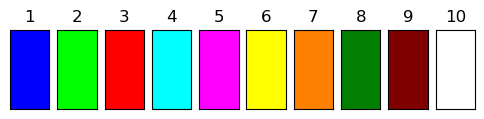

In [13]:
color_box = np.zeros((10, 5, 3))
plt.figure(dpi=100)  
for i in range(10): 
    plt.subplot(1, 10, i+1)
    color_box[:, :, :] = color_dict[i]
    plt.imshow(color_box.astype(np.uint8))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.title(i+1)

## All asigned

In [24]:
mask = np.zeros(masks_mem.shape)
for i, l in enumerate(cell_id[1:]):
    mask[masks_mem==i+1] = l+1  # avoid label l being 0 because the background is 0
    # i+1 because index still starts with 0
#     print(i)
#     print(l)
    
# mask /= 10

In [7]:
np.unique(mask)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [7]:
# plt.figure(dpi=300)
# plt.imshow(mask)
# plt.axis('image')

In [25]:
mask_color = np.zeros((*mask.shape, 3))
for i in range(len(color_dict)): 
    mask_color[mask==i+1] = color_dict[i]

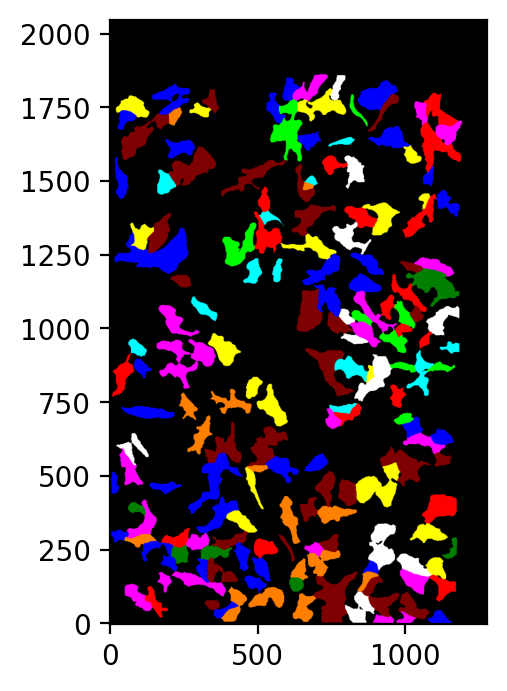

In [26]:
plt.figure(dpi=200)    
plt.imshow(mask_color.astype(np.uint8), origin='lower')

## Without double infected
nd

In [32]:
# mask_nd = np.zeros(masks_mem.shape)
# for i, l in enumerate(cell_id[1:]):
# #     if df_cell_id.select_by_correlation[i]==True:
# #     if df_cell_id.correlation_difference[i]>0.26:
#     mask_nd[masks_mem==i+1] = l+1

In [33]:
# mask_color_nd = np.zeros((*mask_nd.shape, 3))
# for i in range(len(color_dict)): 
#     mask_color_nd[mask_nd==i+1] = color_dict[i]

Text(0.5, 1.0, 'Double infection removed')

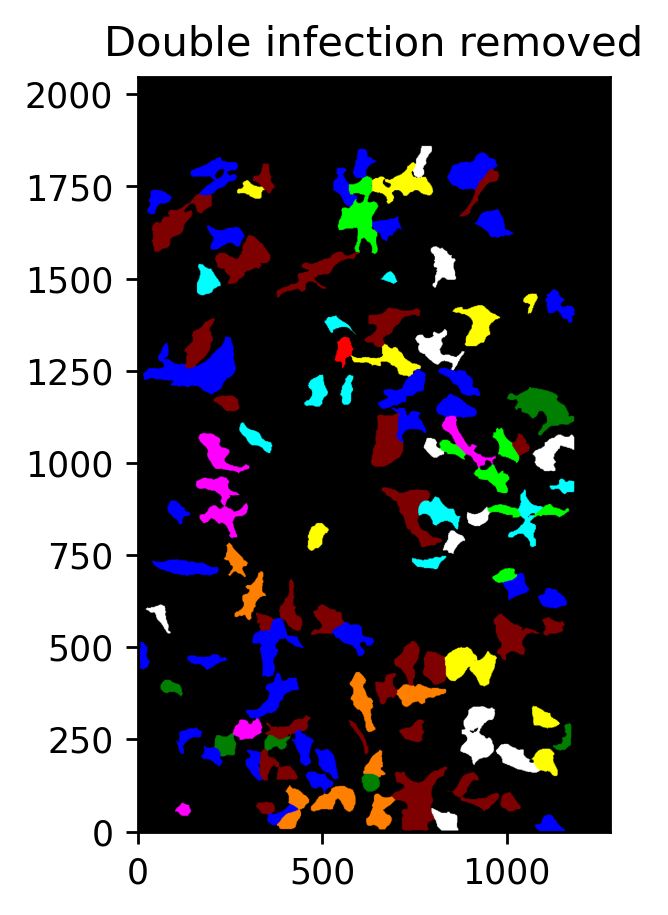

In [50]:
no_double = df_cell_id.barcode[df_cell_id.select_by_correlation==True]
mask_color_nd = np.zeros((*masks_mem.shape, 3))
for i in no_double.index:
    if i>0:
        mask_color_nd[np.array(masks_mem)==i] = color_dict[no_double[i]]
plt.figure(dpi=250)
plt.imshow(mask_color_nd.astype(np.uint8), origin='lower')
plt.title("Double infection removed")

In [43]:
# np.zeros((*mask_nd.shape, 3))

## Without low number of spots
nl

Text(0.5, 1.0, 'Cells with low number of spots removed')

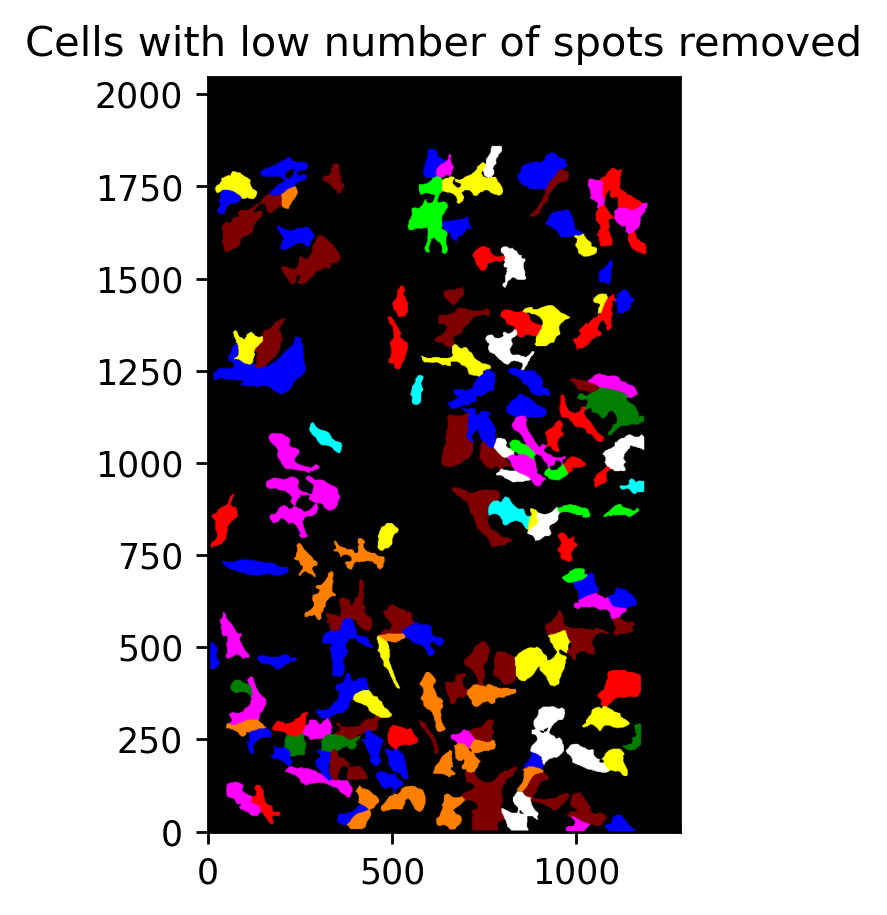

In [51]:
no_low = df_cell_id.barcode[df_cell_id.select_by_spots==True]
mask_color_nl = np.zeros((*masks_mem.shape, 3))
for i in no_low.index:
    if i>0:
        mask_color_nl[np.array(masks_mem)==i] = color_dict[no_low[i]]
plt.figure(dpi=250)
plt.imshow(mask_color_nl.astype(np.uint8), origin='lower')
plt.title('Cells with low number of spots removed')

## Finally selected
fs

Text(0.5, 1.0, 'Selected cells')

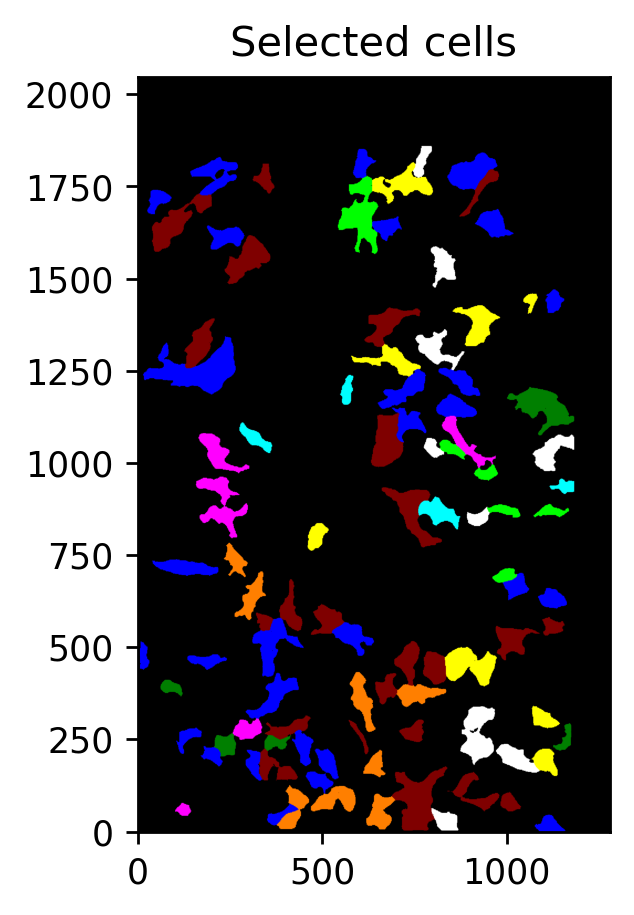

In [52]:
no_low = df_cell_id.barcode[df_cell_id.selected==True]
mask_color_nl = np.zeros((*masks_mem.shape, 3))
for i in no_low.index:
    if i>0:
        mask_color_nl[np.array(masks_mem)==i] = color_dict[no_low[i]]
plt.figure(dpi=250)
plt.imshow(mask_color_nl.astype(np.uint8), origin='lower')
plt.title('Selected cells')